In [87]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [35]:
#for imputing missing and inconsistent data
# this is a patient data with details of their health conditions
data=pd.read_csv("health_data.csv")

In [36]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [38]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [39]:
data1=data.isnull().mean()*100

In [40]:
data1.sort_values(ascending=False)

glucose            9.155262
education          2.477584
BPMeds             1.250590
totChol            1.179802
cigsPerDay         0.684285
BMI                0.448325
heartRate          0.023596
male               0.000000
age                0.000000
currentSmoker      0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
TenYearCHD         0.000000
dtype: float64

In [41]:
# we can start with replacing missing data

In [42]:
#1.heartRate
data[data['heartRate'].isnull()]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
689,1,64,1.0,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


In [43]:
#this is a critical data with heart rate null, a heartRate is important for patient's statusalive or not
#so for these data have to clarify with the customer or client for imputing
# since the column "TenYearCHD" is set , the person has chronic heart disease, he may be not alive or not now

In [44]:
data['heartRate'].min()

44.0

In [45]:
# so replacing with minimum value
data['heartRate'].fillna(44,inplace=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [50]:
#2.BMI
data[data['BMI'].isnull()]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
97,0,40,2.0,0,0.0,0.0,0,0,0,205.0,100.0,60.0,NaN,60.0,72.0,1
294,0,47,1.0,1,25.0,0.0,0,1,1,258.0,195.0,90.0,NaN,86.0,NaN,1
705,0,45,3.0,0,0.0,0.0,0,0,0,231.0,107.5,57.5,NaN,81.0,NaN,0
1155,0,64,2.0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1161,0,47,2.0,0,0.0,0.0,0,0,0,195.0,126.0,75.0,NaN,60.0,NaN,1
1594,0,40,2.0,0,0.0,0.0,0,0,0,164.0,135.0,75.0,NaN,75.0,85.0,0
1604,1,40,NaN,1,20.0,0.0,0,0,0,266.0,101.0,73.0,NaN,70.0,64.0,0
1624,0,70,1.0,0,0.0,0.0,1,1,0,107.0,143.0,93.0,NaN,68.0,62.0,1
1747,0,51,1.0,0,0.0,0.0,0,0,0,NaN,130.0,89.5,NaN,80.0,NaN,0
1975,1,63,1.0,1,20.0,0.0,1,1,0,213.0,163.0,94.0,NaN,76.0,69.0,1


In [51]:
data['BMI'].mean()

25.80200758473572

In [53]:
#imputing with mean
data['BMI'].fillna(data['BMI'].mean(),inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [56]:
#3.cigsPerDay
data[data['cigsPerDay'].isnull()]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
131,1,43,4.0,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0
139,1,49,4.0,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1
1046,0,49,1.0,1,NaN,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.0,0
1292,1,42,3.0,1,NaN,0.0,0,0,0,225.0,122.5,80.0,25.54,90.0,90.0,0
1347,0,58,4.0,1,NaN,0.0,0,1,0,270.0,195.0,117.5,23.35,75.0,NaN,0
1451,1,54,1.0,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1497,1,55,1.0,1,NaN,0.0,0,0,0,214.0,132.5,85.5,29.25,70.0,103.0,0
1610,0,61,1.0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
1625,0,49,2.0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0
1870,0,47,2.0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0


In [58]:
data['cigsPerDay'].mean()

9.003088619624615

In [59]:
#again it is acontinuous value, so replacing with mean
data['cigsPerDay'].fillna(data['cigsPerDay'].mean(),inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [62]:
data[data['totChol'].isnull()]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
42,0,52,1.0,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.090000,70.0,NaN,1
154,0,38,3.0,1,3.0,1.0,0,1,0,NaN,125.0,80.0,22.790000,98.0,NaN,0
247,0,40,2.0,1,20.0,0.0,0,0,1,NaN,114.0,65.0,21.190000,61.0,NaN,1
429,1,65,NaN,0,0.0,0.0,0,0,0,NaN,152.5,97.5,28.350000,65.0,73.0,0
567,0,66,2.0,1,15.0,0.0,0,1,0,NaN,188.0,108.5,20.490000,90.0,NaN,0
577,0,37,2.0,1,30.0,0.0,0,0,0,NaN,115.0,79.0,28.410000,85.0,NaN,0
609,0,41,1.0,1,30.0,0.0,0,0,0,NaN,122.5,80.0,18.860000,105.0,NaN,0
673,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.080000,78.0,NaN,0
822,0,62,2.0,1,30.0,0.0,0,0,0,NaN,153.0,60.0,27.470000,60.0,NaN,0
834,0,59,1.0,0,0.0,0.0,0,1,0,NaN,153.5,89.5,26.080000,71.0,113.0,0


In [63]:
data['totChol'].mean()

236.72158548233045

In [64]:
data['totChol'].value_counts()

totChol
240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
392.0     1
405.0     1
359.0     1
398.0     1
119.0     1
Name: count, Length: 248, dtype: int64

In [68]:
data['totChol'].max()

696.0

In [69]:
data[data['totChol'].isnull()]['TenYearCHD'].value_counts()

TenYearCHD
0    41
1     9
Name: count, dtype: int64

In [70]:
#less patients have chd with totochol null, soreplacing with mean
data['totChol'].fillna(data['totChol'].mean(),inplace=True)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [72]:
#4.BPMeds
data[data['BPMeds'].isnull()]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
49,1,36,3.0,1,20.0,NaN,0,1,0,194.000000,139.0,93.0,24.33,80.0,62.0,0
77,0,44,3.0,1,20.0,NaN,0,0,0,213.000000,115.0,72.5,21.16,80.0,89.0,0
193,1,45,3.0,1,40.0,NaN,0,0,0,278.000000,135.0,84.0,23.79,75.0,79.0,1
245,1,46,1.0,1,30.0,NaN,0,1,0,253.000000,147.0,85.0,30.62,100.0,75.0,0
314,0,39,2.0,0,0.0,NaN,0,0,0,242.000000,113.0,85.0,25.54,85.0,104.0,0
395,0,65,2.0,0,0.0,NaN,0,1,0,270.000000,165.0,98.0,21.66,62.0,92.0,1
421,1,44,1.0,0,0.0,NaN,0,0,1,190.000000,122.0,81.0,36.12,70.0,143.0,0
765,1,50,4.0,1,9.0,NaN,0,0,0,296.000000,119.0,90.0,23.55,75.0,69.0,1
769,0,37,3.0,0,0.0,NaN,0,0,0,145.000000,105.0,73.0,23.44,58.0,80.0,0
797,0,59,4.0,0,0.0,NaN,0,1,0,240.000000,195.0,118.0,23.82,80.0,73.0,0


In [73]:
data['BPMeds'].value_counts()

BPMeds
0.0    4061
1.0     124
Name: count, dtype: int64

In [74]:
#categorical data, so imputing with mode
data['BPMeds'].mode()

0    0.0
Name: BPMeds, dtype: float64

In [75]:
data['BPMeds'].fillna(0,inplace=True)

In [76]:
#5.education , categorical value
data['education'].value_counts()

education
1.0    1720
2.0    1253
3.0     687
4.0     473
Name: count, dtype: int64

In [77]:
data['education'].mode()

0    1.0
Name: education, dtype: float64

In [78]:
#replacing with mode
data['education'].fillna(1,inplace=True)

In [79]:
#6. glucose , this is the column with maximum empties
data['glucose'].mean()

81.96675324675324

In [80]:
data['glucose'].max()

394.0

In [81]:
data['glucose'].min()

40.0

In [82]:
#here replacing with mean
data['glucose'].fillna(data['glucose'].mean(),inplace=True)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [84]:
# all columns with missing values are imputed with values

In [85]:
#check for outliers

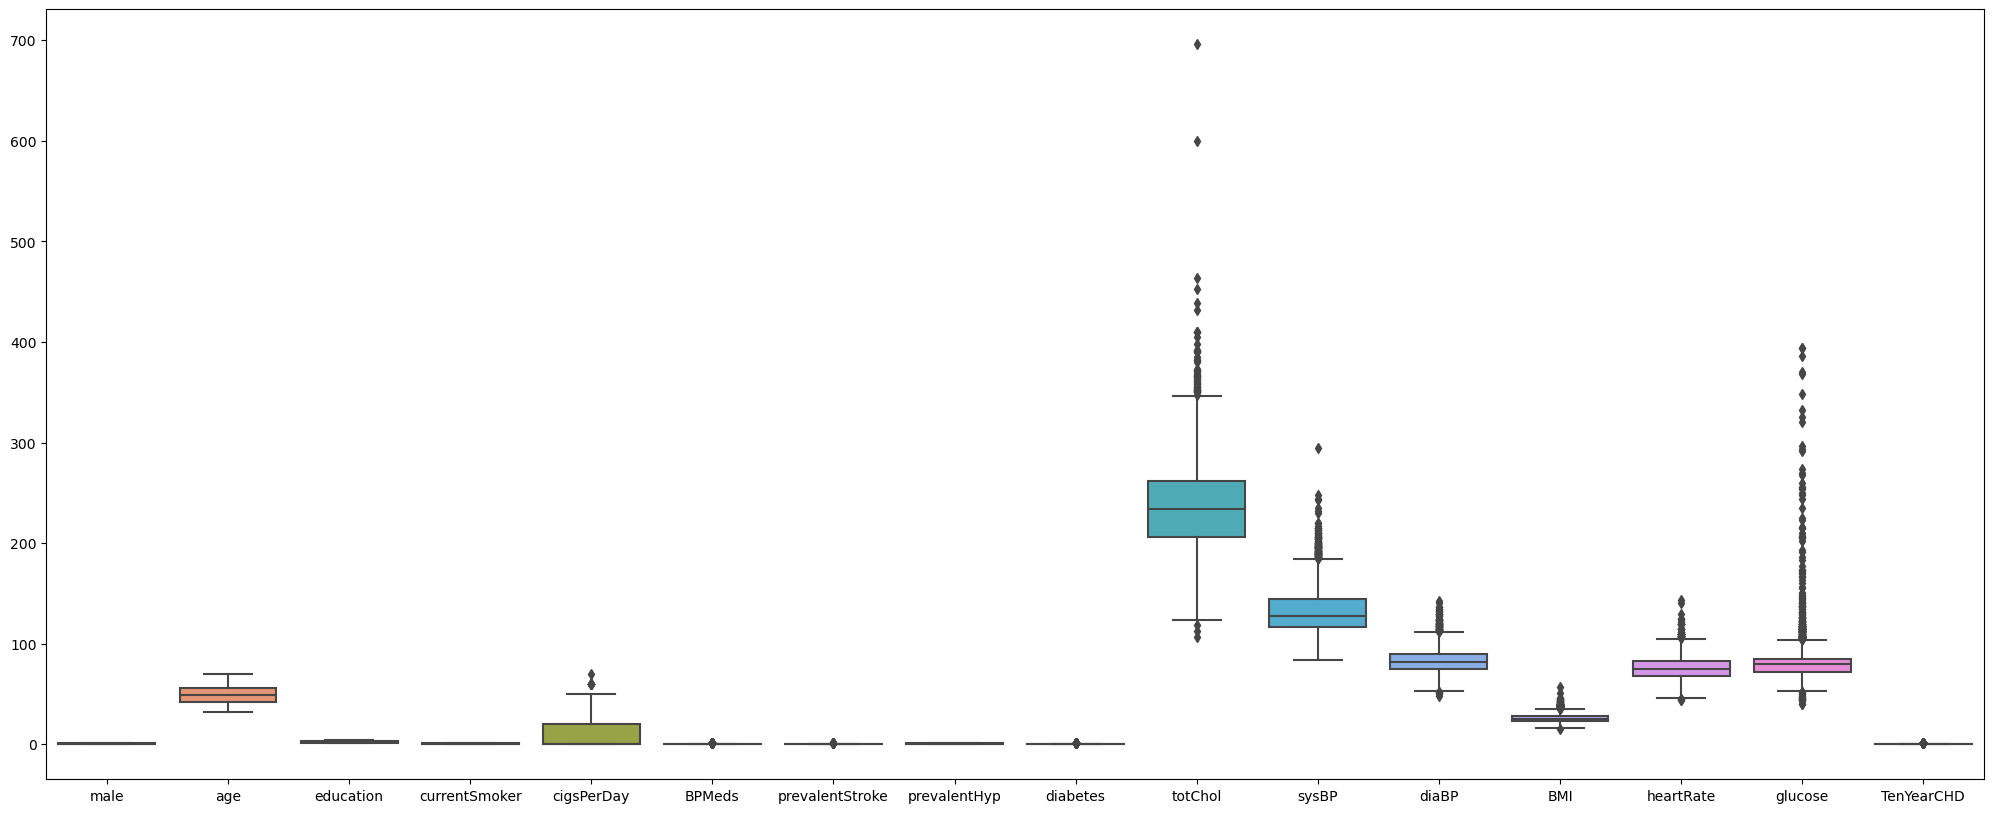

In [91]:
plt.figure(figsize=(25,10))
sns.boxplot(data)
plt.show()

In [92]:
#in real time data, outliers are common, so it can be treated and transformed
#By l0g or inverse or square root or boxxcox transformation
#here i use log transforamtion for columns totChol,sysBP,diaBP,BMI,heartRate,glucose

In [93]:
data['totChol'] = np.log2(data['totChol'])

In [94]:
data['sysBP'] = np.log2(data['sysBP'])
data['diaBP'] = np.log2(data['diaBP'])
data['BMI'] = np.log2(data['BMI'])
data['heartRate'] = np.log2(data['heartRate'])
data['glucose'] = np.log2(data['glucose'])

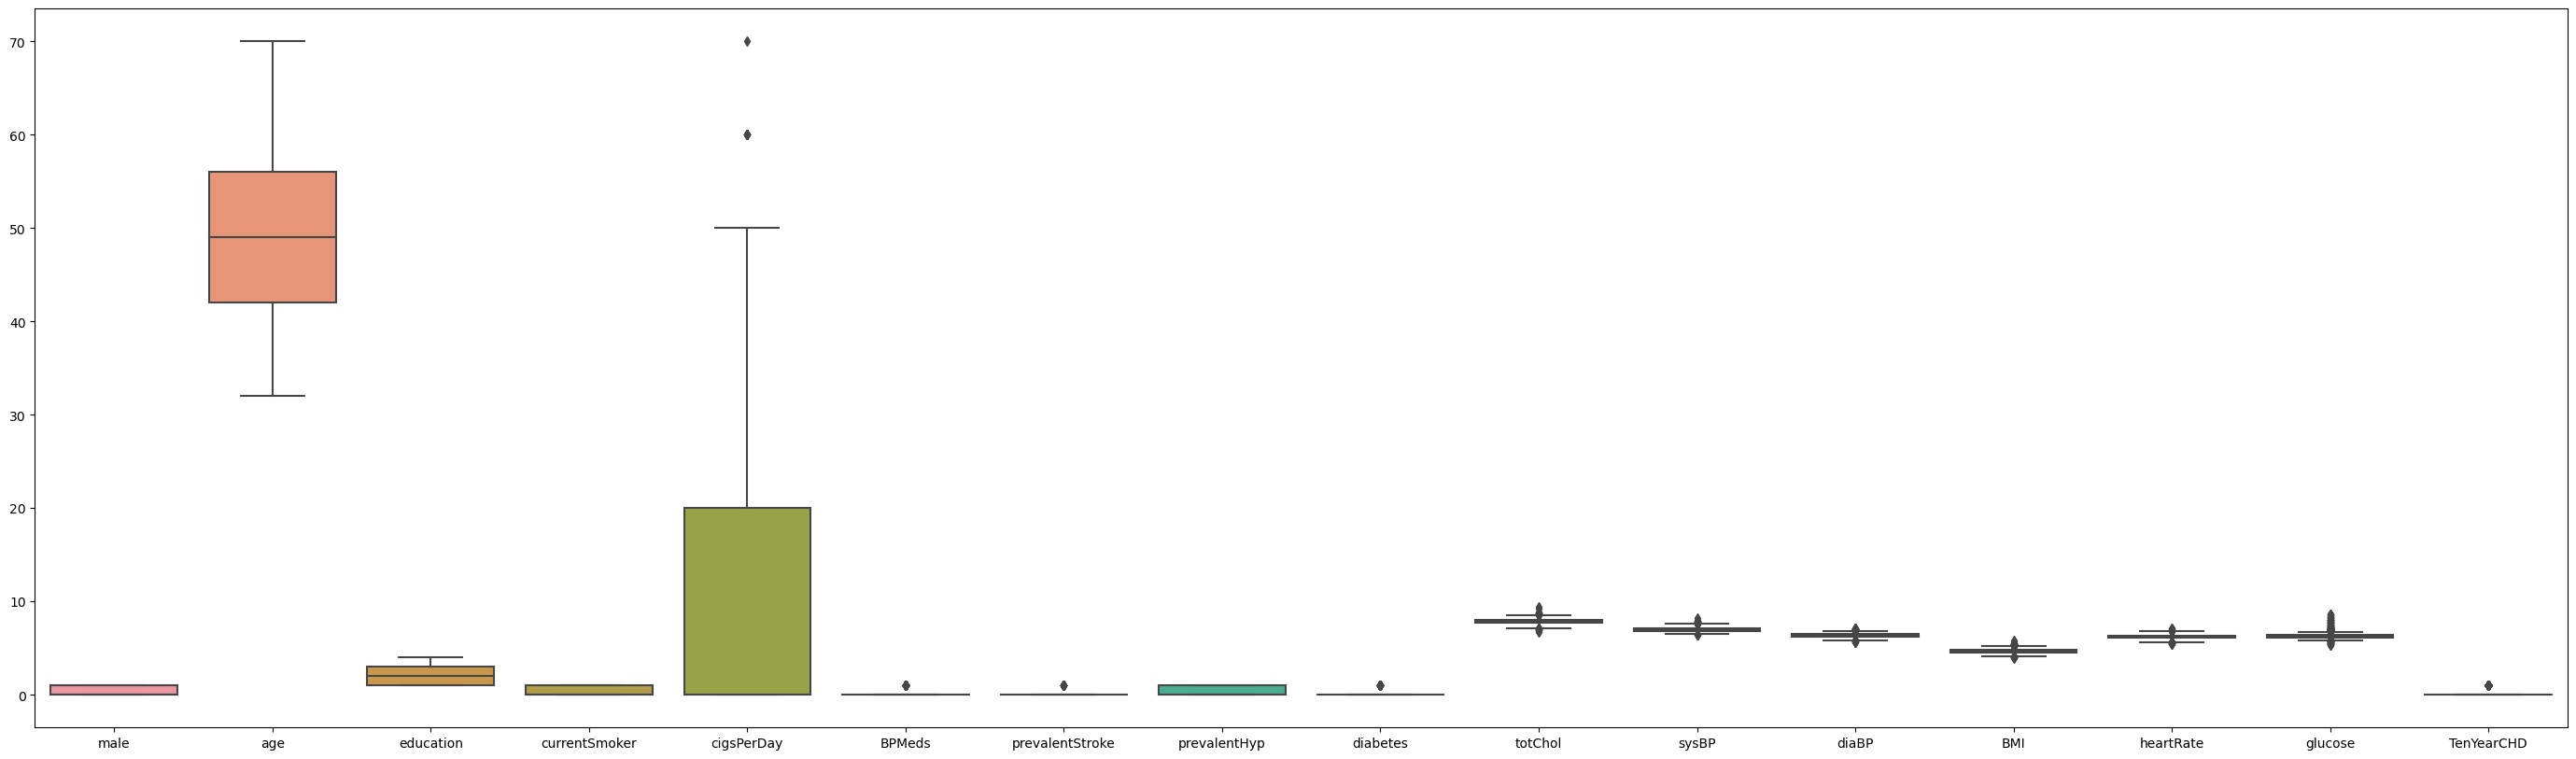

In [99]:
plt.figure(figsize=(35,10))
sns.boxplot(data)
plt.show()

In [100]:
# outliers are some what fixed in log transformation

In [101]:
#here in all the categorical columns are already encoded

In [102]:
data.head(50)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,7.607330,6.727920,6.129283,4.753284,6.321928,6.266787,0
1,0,46,2.0,0,0.0,0.0,0,0,0,7.965784,6.918863,6.339850,4.844486,6.569856,6.247928,0
2,1,48,1.0,1,20.0,0.0,0,0,0,7.936638,6.994353,6.321928,4.663345,6.228819,6.129283,0
3,0,61,3.0,1,30.0,0.0,0,1,0,7.813781,7.228819,6.569856,4.836934,6.022368,6.686501,1
4,0,46,3.0,1,23.0,0.0,0,0,0,8.154818,7.022368,6.392317,4.529821,6.409391,6.409391,0
5,0,43,2.0,0,0.0,0.0,0,1,0,7.832890,7.491853,6.781360,4.921246,6.266787,6.629357,0
6,0,63,1.0,0,0.0,0.0,0,0,0,7.679480,7.108524,6.149747,5.049195,5.906891,6.409391,1
7,0,45,2.0,1,20.0,0.0,0,0,0,8.290019,6.643856,6.149747,4.438293,6.303781,6.285402,0
8,1,52,1.0,0,0.0,0.0,0,1,0,8.022368,7.144658,6.475733,4.720278,6.247928,6.303781,0
9,1,43,1.0,1,30.0,0.0,0,1,0,7.813781,7.339850,6.741467,4.561326,6.539159,6.459432,0


In [103]:
# next step is Standarization.cigsPerDay values can be standardized by standard scalar or minmax scalar
#here i use Standard scalar is used

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
std = StandardScaler()

In [108]:
data['cigsPerDay'] = std.fit_transform(data[['cigsPerDay']])

In [109]:
data.head(50)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,-0.757974,0.0,0,0,0,7.607330,6.727920,6.129283,4.753284,6.321928,6.266787,0
1,0,46,2.0,0,-0.757974,0.0,0,0,0,7.965784,6.918863,6.339850,4.844486,6.569856,6.247928,0
2,1,48,1.0,1,0.925835,0.0,0,0,0,7.936638,6.994353,6.321928,4.663345,6.228819,6.129283,0
3,0,61,3.0,1,1.767740,0.0,0,1,0,7.813781,7.228819,6.569856,4.836934,6.022368,6.686501,1
4,0,46,3.0,1,1.178407,0.0,0,0,0,8.154818,7.022368,6.392317,4.529821,6.409391,6.409391,0
5,0,43,2.0,0,-0.757974,0.0,0,1,0,7.832890,7.491853,6.781360,4.921246,6.266787,6.629357,0
6,0,63,1.0,0,-0.757974,0.0,0,0,0,7.679480,7.108524,6.149747,5.049195,5.906891,6.409391,1
7,0,45,2.0,1,0.925835,0.0,0,0,0,8.290019,6.643856,6.149747,4.438293,6.303781,6.285402,0
8,1,52,1.0,0,-0.757974,0.0,0,1,0,8.022368,7.144658,6.475733,4.720278,6.247928,6.303781,0
9,1,43,1.0,1,1.767740,0.0,0,1,0,7.813781,7.339850,6.741467,4.561326,6.539159,6.459432,0
